In [1]:
# Python translation of NLDSIM in LabView
# This program enables you to plot signals with respect to time, each other, and apply fourier analysis


# Author: Borna Maghoul

In [2]:
# Importing neccessary libraries

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import matplotlib.animation as animation
from scipy.fftpack import fft
%matplotlib notebook

In [3]:
# Defining Various different functions and variables, feel free to adjust to your liking

def func_1(f_1,t):
    return np.cos(2*np.pi*f_1*t)

def func_2(f_2,t):
    return np.cos(2*np.pi*f_2*t + np.pi/8) # Including the phase of pi/8 for the XY plot

def func_3(a,f_1,f_2,t):
    return a*func_1(f_1,t)*func_2(f_2,t)

num_of_samp = 1020 # Number of samples for the signal
samp_rate = 2703   # Sample rate for the signal. Please be mindful of the Nyquist frequency for your signal
t = np.linspace(0,num_of_samp/samp_rate,num_of_samp) # Array for the time at which the signal is being sampled

<IPython.core.display.Javascript object>


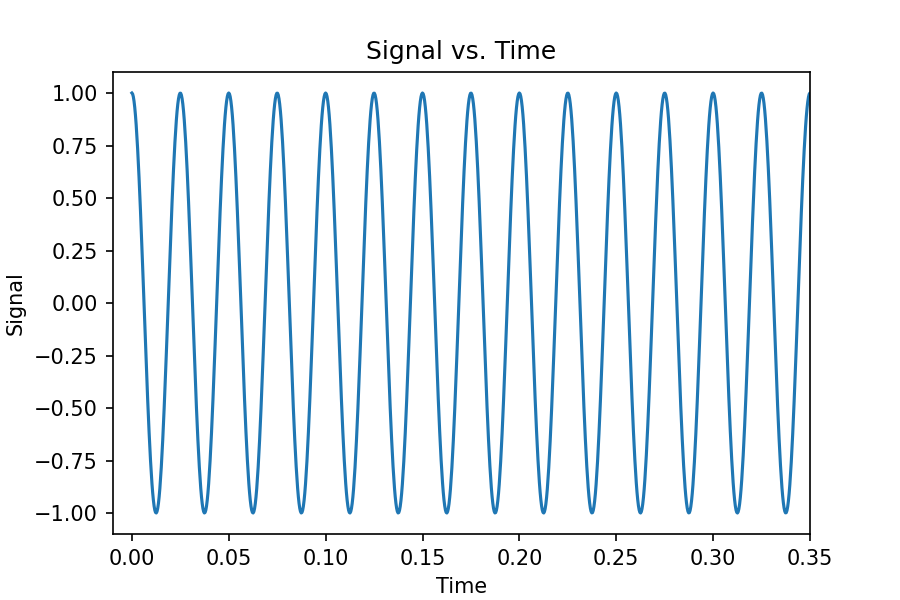

In [4]:
# Signal versus time. Feel free to use your own function. 
# For a smoother plot, increase the sample rate. For a more elaborate plot, increase the number of samples

f1 = 40
plt.figure(figsize=(6, 4))
plt.plot(t,func_1(f1,t),'-')
plt.title('Signal vs. Time')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.xlim([-.01,.35])
plt.show()

<IPython.core.display.Javascript object>


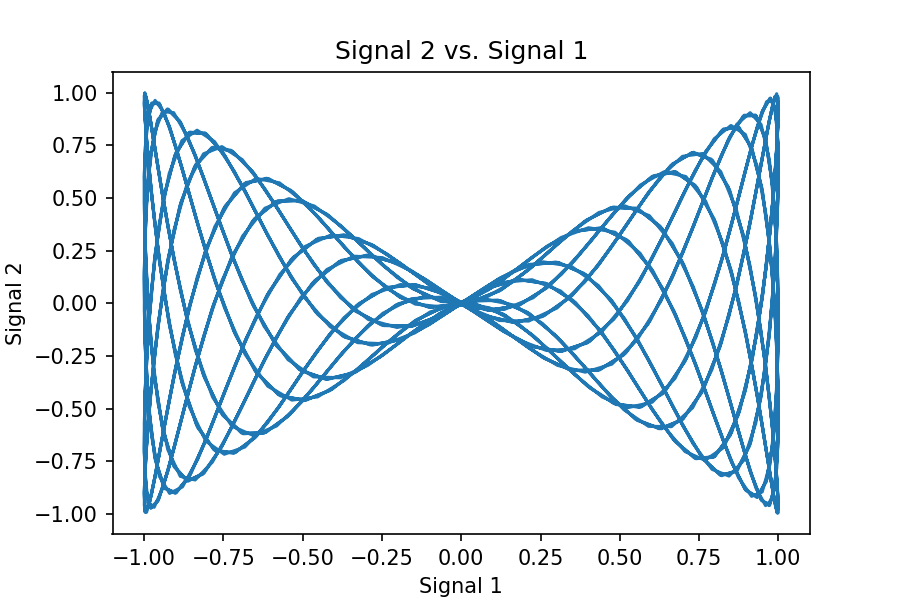

In [5]:
#X-Y plot of one signal versus another. Feel free to adjust to your liking
# For a smoother plot, increase the sample rate. For a more elaborate plot, increase the number of samples

plt.figure(figsize=(6, 4))
plt.plot(func_1(f1,t),func_3(1,f1,144,t),'-')
plt.title('Signal 2 vs. Signal 1')
plt.xlabel('Signal 1')
plt.ylabel('Signal 2')
plt.show()

<IPython.core.display.Javascript object>


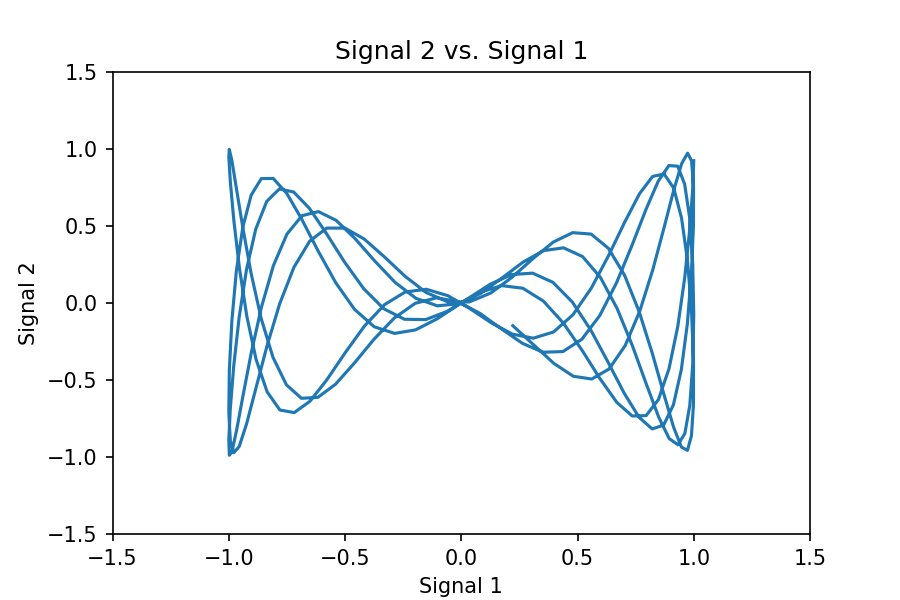

In [6]:
# Same X-Y plot for the signals as above, only this one is animated

x = func_1(f1,t)
y = func_3(1,f1,144,t)
fig, ax = plt.subplots(figsize=(6,4))
line, = ax.plot(x, y, '-')
ax.set_title('Signal 2 vs. Signal 1')
ax.set_xlabel('Signal 1')
ax.set_ylabel('Signal 2')


def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([-1.5, 1.5, -1.5, 1.5]) # Change this to adjust your axes. Format is: [x_low, x_high, y_low, y_high]
    return line,

ani = animation.FuncAnimation(fig, update, len(t), fargs=[x, y, line],
                              interval=5, blit=True) # Interval is how quickly the animation updates in units of milliseconds.
                                                     # Decrease to increase the speed of the animation, but can be computationally
                                                     # intensive.
#ani.save('test.gif')  # Allows a video of the animation to be saved. Has not been tested, use at your own risk
plt.show()


<IPython.core.display.Javascript object>


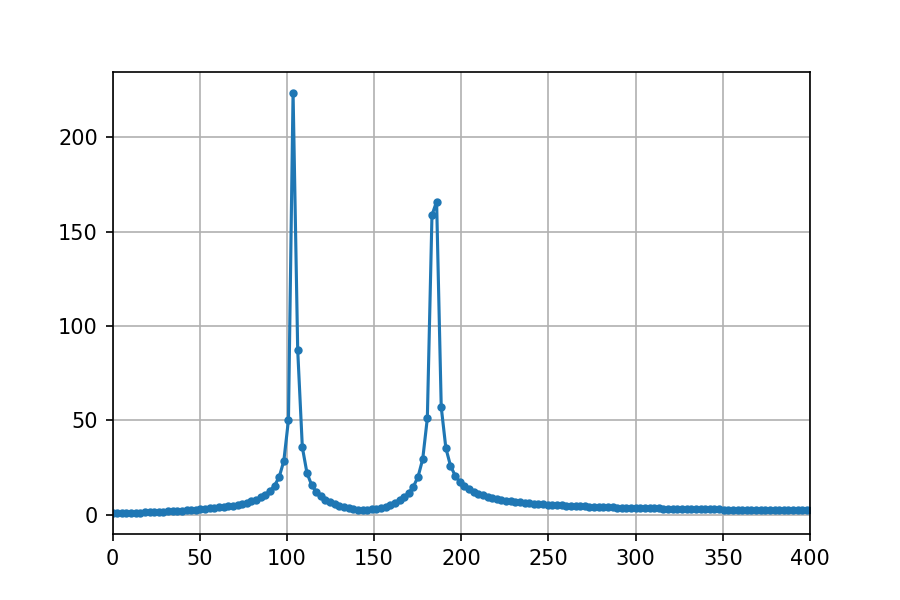

In [7]:
# FFT(Fast Fourier Transform) of a signal

yf = fft(func_3(1,f1,144,t))
xf = np.linspace(0.0, samp_rate/2, num_of_samp//2) # X-axis of a Fourier transform represents frequency.
                                                   # The division by 2 is introduced since the output of the FFT function 
                                                   # is one array composed of two parts, the first being the coefficients(gain?) of
                                                   # positive frequencies, the second being of negative frequencies.
                                                   # The division by 2 exists to truncate the data to exclude negative frequencies

plt.figure(figsize=(6,4))
plt.plot(xf,  np.abs(yf[0:num_of_samp//2]),'.-')
plt.xlim(0,400)
plt.grid()
plt.show()